In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [38]:
train = pd.read_csv('train.csv')
train.info()
print(train.shape)
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Train dataseti okundu.. info ile bilgiler görüntülendi, shape yazdırıldı ve ilk beş değerini incelendi.

In [39]:
test = pd.read_csv('test.csv')
test.info()
print(test.shape)
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


İşlemler test datasetimiz için de tekrarlandı.

In [40]:
y_train = train["label"]
x_train = train.drop(labels = ["label"],axis=1)


Train datasetinde label sütunu y_train olarak alındı. Label değerleri hariç olan değerler x_train olarak tutuldu.

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

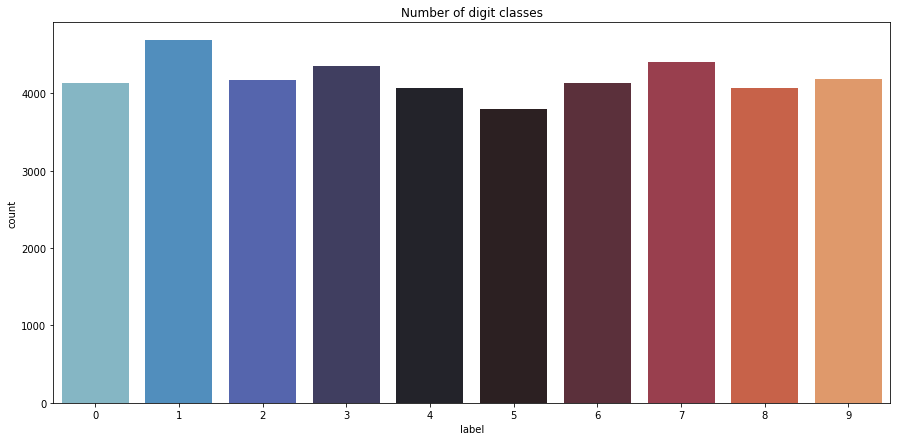

In [41]:
plt.figure(figsize = (15,7))
sns.countplot(y_train,palette="icefire")
plt.title("Number of digit classes")
y_train.value_counts()

y_train içerisinde bulunan label değerlerini incelemek için figgure oluşturuldu. Böylece her bir label için sayma işlemi
gerçekleşti, her bir label değerinden kaç tane olduğu bilgisi incelendi.

<function matplotlib.pyplot.show(*args, **kw)>

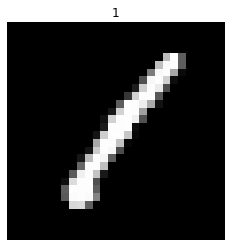

In [42]:
img = x_train.iloc[0].as_matrix()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis('off')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

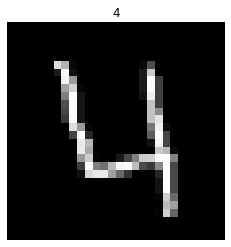

In [43]:
img = x_train.iloc[3].as_matrix()
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[3,0])
plt.axis('off')
plt.show

x_train içerisinde bulunan bilgiler ile görüntü oluşturuldu. Bunun için x_trainde 0. ve 3. indexli görüntü bilgileri 
(28,28) ile  boyutlandırılarak matris halinde gösterildi. Çıktı için x_train dosyasının kullanıldığına dikkat ediniz
y-train yalnızca label değerlerini tutmaktadır.

In [44]:
x_train = x_train/255.0
test= test/255.0
print("x shape", x_train.shape)
print("test shape ", test.shape)

x shape (42000, 784)
test shape  (28000, 784)


Normalization uygulandı.

In [45]:
x_train = x_train.values.reshape(-1,28,28,1)
test= test.values.reshape(-1,28,28,1)
print("train shape:", x_train.shape)
print("test shape:", test.shape)

train shape: (42000, 28, 28, 1)
test shape: (28000, 28, 28, 1)


In [46]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)

Keras kütüphanesinde to_categorial metodu import edildi çünkü bu binarybbir sınıflandırma değildir.Elimizde ikiden fazla label
olması dolayısıyla to_categorial kullanıldı ve num_classes 10 farklı sınıf olduğu için 10 olarak verildi.

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.1,random_state=2)
print("x_train shape", x_train.shape)
print("x_val shape", x_val.shape)
print("y_train shape", y_train.shape)
print("y_val shape", y_val.shape)



x_train shape (37800, 28, 28, 1)
x_val shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_val shape (4200, 10)


x_train ve y_train yeniden x_train, y_train ve x_val, y_val olarak train_test_split metodu ile 0.1 oranında ayrıldı.
Çünkü modelimizin oluşturduktan sonra ilk aşamada test etmek için x_val değerleri kullanılacktır. Buda eğitilen modelin 
güvenirliliğini ölçmek içindir.

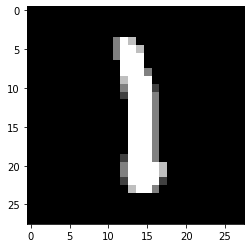

In [48]:
plt.imshow(x_train[5][:,:,0],cmap='gray')
plt.show()

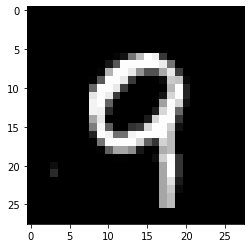

In [49]:
plt.imshow(x_train[70][:,:,0],cmap='gray')
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Keras kütüphanesi kullanılarrak model oluşturulmuştur. CNN mimarisinn sıralı bir model olması dolayısıyla Sequential model 
kullanılmıştır. İlk olarak modelimize convolution için(5,5) boyutunda 8 filtre eklenmiş, padding için same metodu belirlenmiş
input_shape değeri verilmiştir. Poolig işlemi için (2,2) boyutunda maxpool eklenmiş, dropout 0.25 olarak verilmiştir.
Ardından tekrar convolution işlemi tekrar Poolig işlemi gerçekleştirilmiştir. Böylece convolution kısmı bitmiş ANN kısmına 
input değeri verilirken flatten işlemi gerçekleştirilmiştir. ANN için bir hidden layer ve output layer oluşturulmuştur.
Softmax metodu kullanılmıştır çünkü multi classification gerçekleştirilmektedir. 

In [51]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

Optimizer metodu olrak Adam optimizer kullanılmıştır. Adam metod sayesinde learning rate değerleri değiştirilmektedir.

In [52]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

Model compile değerleri verilmiştir. Loss değeri hesaplanırken categorical_crossentropy metodu verilmiştir. Metrics değeri
ise değerlendirme yapılacak olan değerdir. Modelimizn accuracy değerleri değerlendirilecektir. Bu sebeple metrics değeri
accuracy olarak verilmiştir.

In [53]:
epochs = 10  
batch_size = 250

In [54]:

datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0.5,  
        zoom_range = 0.5, 
        width_shift_range=0.5,  
        height_shift_range=0.5,  
        horizontal_flip=False,  
        vertical_flip=False)  

datagen.fit(x_train)

Elimizde bulunan datanın yetersizliği ve modeli iyi eğitmek için datamızdaki görüntüleri arttırmak amacıyla ImageDataGenerator
yapıldı. ImageDataGenerator'da istenilen görüntüleri elde etmek için değerler verildi. Örneğin : zoom_range = 0.5 deilerek
0.5 oranında zoom edilmiş bir görüntü elde edildi. Son olarak datagen x_traine fit edildi.

In [55]:

history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 16s 107ms/step - loss: 2.1714 - accuracy: 0.1950 - val_loss: 1.6886 - val_accuracy: 0.4810
Epoch 2/10
151/151 [==============================] - 16s 104ms/step - loss: 1.8804 - accuracy: 0.3288 - val_loss: 1.1126 - val_accuracy: 0.7552
Epoch 3/10
151/151 [==============================] - 15s 97ms/step - loss: 1.6987 - accuracy: 0.4050 - val_loss: 0.8558 - val_accuracy: 0.7824
Epoch 4/10
151/151 [==============================] - 15s 102ms/step - loss: 1.6052 - accuracy: 0.4412 - val_loss: 0.6448 - val_accuracy: 0.8521
Epoch 5/10
151/151 [==============================] - 14s 94ms/step - loss: 1.5272 - accuracy: 0.4684 - val_loss: 0.5582 - val_accuracy: 0.8640
Epoch 6/10
151/151 [==============================] - 14s 95ms/step - loss: 1.4757 - accuracy: 0.4912 - val_loss: 0.4756 - val_accuracy: 0.8774
Epoch 7/10
151/151 [==============================] - 14s 93ms/step - loss: 1.4392 - accuracy: 0.5049 - val_loss: 0.4685 - val_accura

Model fit edildi ve kullanılmak üzere historye atıldı.

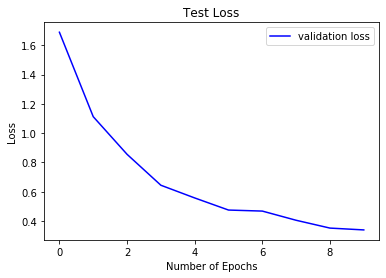

In [58]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Her bir epochtaki loss değerleri çizdirildi.

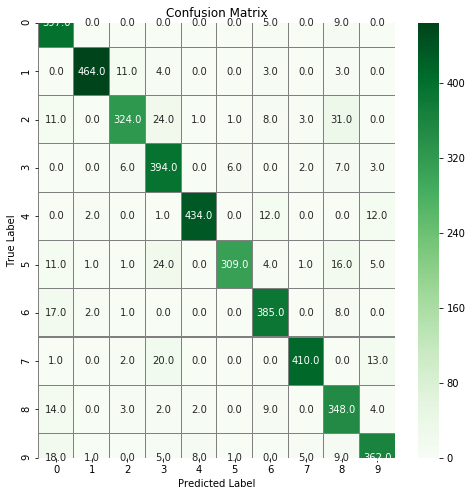

In [64]:
import seaborn as sns
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Confusion matrix çizdirildi. Tahmin edilen değerler ile doğru olan değerler karşılaştırıldı. Modelin performansı görüldü.
Örneği 434 defa 4 olan değer 4 olarak tahmin edilmiştir.